# Data operations

## Import libraries

In [3]:
from scivision.io import load_dataset

import matplotlib.pyplot as plt

## Load catalog

To load an intake catalog from a Catalog file:

In [4]:
cat = load_dataset('https://github.com/alan-turing-institute/plankton-dsg-challenge')

## Explore the catalog entries

Let's inspect the entries of the catalog.

In [ ]:
list(cat)

The catalog contains three data sources: 'index_file', 'plankton_single', 'plankton_multiple'. We're exploring each one of them in the next sections.

## Fetch the CSV index file

The first entry corresponds to an index file, imported as a `pandas.DataFrame`, which contain the list of all plankton images. Each image include its index, filename, and labels according to three levels of classication: `label1` (zooplankton vs detritus), `label2` (noncopedod vs copedod) and `label3` (species).

In [ ]:
index_all = cat.index_file().read()

## Fetch the complete dataset entry

The final entry refers to load the full dataset. All images are stacked into a single `xarray.Dataset` object with a defined dimension, 1040 px x 832 px.

In [30]:
ds_all = cat.plankton_multiple().to_dask()

In [32]:
print(ds_all)

<xarray.Dataset>
Dimensions:                               (concat_dim: 58752, y: 832, x: 1040, channel: 3)
Coordinates:
  * concat_dim                            (concat_dim) int64 0 1 ... 58750 58751
  * y                                     (y) int64 0 1 2 3 ... 828 829 830 831
  * x                                     (x) int64 0 1 2 3 ... 1037 1038 1039
  * channel                               (channel) int64 0 1 2
    filename                              (concat_dim) <U38 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/23)
    raster                                (concat_dim, y, x, channel) uint8 dask.array<chunksize=(1, 832, 1040, 3), meta=np.ndarray>
    EXIF Image ImageWidth                 (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image ImageLength                (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image BitsPerSample              (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarr

Let's subset a single image. This can be done using the image index stored in `concat_dim`.

In [34]:
subset = ds_all.sel(concat_dim=0)

In [36]:
print(subset)

<xarray.Dataset>
Dimensions:                               (y: 832, x: 1040, channel: 3)
Coordinates:
    concat_dim                            int64 0
  * y                                     (y) int64 0 1 2 3 ... 828 829 830 831
  * x                                     (x) int64 0 1 2 3 ... 1037 1038 1039
  * channel                               (channel) int64 0 1 2
    filename                              <U38 dask.array<chunksize=(), meta=np.ndarray>
Data variables: (12/23)
    raster                                (y, x, channel) uint8 dask.array<chunksize=(832, 1040, 3), meta=np.ndarray>
    EXIF Image ImageWidth                 object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image ImageLength                object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image BitsPerSample              object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image Compression                object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image PhotometricInte

Text(0.5, 1.0, 'Pia1.2016-08-02.1631+N38_hc._fy')

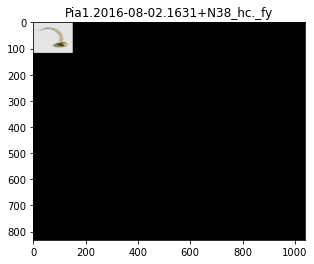

In [39]:
subset = ds_all.sel(concat_dim=2)
plt.imshow(subset['raster'].compute().values[:,:,:])
plt.title(subset.filename.compute().values)